In [21]:
import pandas as pd

try:
  print("Reading test data...", end='')
  df_test_data = pd.read_csv("case_data/BikeRentalDaily_test.csv", delimiter=";")
  print(" success")
  print(df_test_data.head())

  print("\nReading training data...", end='')
  df_train_data = pd.read_csv("case_data/BikeRentalDaily_train.csv", delimiter=";")
  print(" success")
  print(df_train_data.head())
except FileNotFoundError:
  print("Fehler beim lesen der Datei. Falscher Pfad?")

# This is used to store the mean absolute errors together with the calculation
# algorithm in the form [method, mean_absolute_error]. Later in this section
# this is used to generate a visual overview of the results
results_method_mae = []

# Features that will be used for model generation
feature_items=["instant", "season", "yr", "mnth", "holiday", "weekday", "weathersit", "temp", "atemp", "hum", "windspeed", "leaflets", "price reduction"]

# Fix data
train_data_without_nan = df_train_data.dropna()
x_train = train_data_without_nan.filter(items=feature_items).values
y_train = train_data_without_nan.cnt.values

# Question: why do we need to do this?
test_data_without_nan = df_test_data.dropna()
x_test = test_data_without_nan.filter(items=feature_items).values
y_test = test_data_without_nan.cnt.values

print(y_test)

Reading test data... success
   instant  season  yr  mnth  weathersit     temp     atemp        hum  \
0      299     4.0   0    10           2  19.3667  0.472846  108.06255   
1      458     2.0   1     4           1  17.3565  0.427513   75.65220   
2      687     4.0   1    11           1  13.0000  0.326383   81.81255   
3      606     3.0   1     8           1  29.1333  0.666050   93.00000   
4      583     3.0   1     8           1  30.7667  0.731079   97.87500   

   windspeed  outlier   cnt  
0   0.148642    False  3894  
1   0.312139    False  5936  
2   0.179729    False  5629  
3   0.190925    False  7040  
4   0.290421    False  5464  

Reading training data... success
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      154  03.06.2011     2.0   0     6        0        5           1   
1      685  15.11.2012     4.0   1    11        0        4           1   
2      368  03.01.2012     1.0   1     1        0        2           1   
3      472  16.0

In [22]:
# Lineare Regression
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)

print("Regression coefficients: ",reg.coef_)

#Predict all test examples
ypred = reg.predict(x_test)
#Show first 10 prediction results
print(ypred[0:10])

Regression coefficients:  [ 3.18566949e+00  4.33605041e+02  1.43225831e+03 -9.09070082e+01
 -3.46868441e+02  2.16426861e+02 -8.12964412e+02 -1.73078685e+01
  7.68879010e+03 -6.39160185e+00 -7.96617822e+02  1.24566695e+00
  3.53239330e+02]


ValueError: X has 9 features, but LinearRegression is expecting 13 features as input.

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["linear regression", mae])

MAE: 1075.264


In [ ]:
# Visualize linear regression results
import matplotlib.pyplot as plt

def viz_linear():
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_train, reg.predict(x_train), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
# viz_linear()

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_train)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y_train)

ypred = pol_reg.predict(poly_reg.transform(x_test))

# Question: Warum kommen hier negative werte raus? 
print(ypred[0:10])

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["polynominal regression", mae])

[ 3894.00001202  6767.21287411   -16.43907186  2343.69268943
 -6592.2520509   2054.46867707  9451.43694578 -3914.12187939
 10491.69890514  -981.07668026]
MAE: 16680.367


In [ ]:
# Macht es sinn ein LSTM model für time series forecasting zu verwenden?
# spielt die zeit komponente eine rolle bei uns? 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Initialize and fit KNN regression
KNN_reg = KNeighborsRegressor(n_neighbors=20)
KNN_reg.fit(x_train, y_train)

#Predict all test examples
ypred = KNN_reg.predict(x_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["KNN", mae])


MAE: 1158.835


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=1)

ypred = lasso_reg.predict(x_test)

mae = mean_absolute_error(y_test, ypred)
print('MAE: %.3f' % mae)

results_method_mae.append(["Lasso", mae])

MAE: 1071.904


In [ ]:
df_results = pd.DataFrame(results_method_mae, columns = ['Method', 'MAE'])

# Show results of methods
df_results

,Method,MAE
0,linear regression,1075.264492
1,polynominal regression,16680.366756
2,KNN,1158.835217
3,Lasso,1071.903613


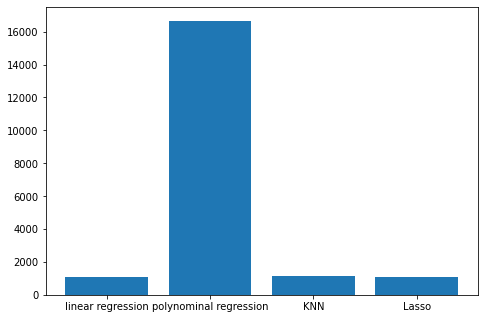

In [ ]:
import matplotlib.pyplot as plt

# Visualize resuts of data frame 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(df_results.Method,df_results.MAE)
plt.show()